# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 
Ημερομηνία εκφώνησης της άσκησης: 23 Νοεμβρίου 2020



## Στοιχεία ομάδας

**Ακαρέπης Ανδρέας** - 03117058  
**Γιαννόπουλος Εμμανουήλ** - 03117031  
**Κόντη Πολυξένη-Ειρήνη** - 03117180

In [ ]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib

     |████████████████████████████████| 1.5MB 7.9MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 1.4 MB 6.8 MB/s 
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434676 sha256=a839eb7849221a520537cd99382265c1ccd45a68a01728893e220627b0d056a6
  Stored in directory: /root/.cache/pip/wheels/de/5e/42/64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 22.2 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
import os
os.listdir('/gdrive/My Drive/NeuralNetworks')
path='/gdrive/My Drive/NeuralNetworks/'

Mounted at /gdrive


## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με περίπου 40.000 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [ ]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

Κάθε ομάδα θα δουλέψει σε ένα μοναδικό υποσύνολο 5.000 ταινιών (διαφορετικό dataset για κάθε ομάδα) ως εξής

1. Κάθε ομάδα έχει έναν αριθμό "seed" (φύτρο) που είναι ο ίδιος με τον αριθμό της ομάδας σας: θα τον βρείτε στην κολόνα Α/Α [εδώ](https://docs.google.com/spreadsheets/d/1CD6AtX7YnocXceCELl_XJ06kyRr0YQPhor8dpw012t0/edit?usp=sharing).

2. Το data frame `df_data_2` έχει γραμμές όσες και οι ομάδες και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset. 

3. Στο επόμενο κελί αλλάξτε τη μεταβλητή `team_seed_number` με το Seed της ομάδας σας.

4. Τρέξτε τον κώδικα. Θα προκύψουν τα μοναδικά για κάθε ομάδα  titles, categories, catbins, summaries και corpus με τα οποία θα δουλέψετε.

In [ ]:
import numpy as np
import textwrap


# βάλτε το seed που αντιστοιχεί στην ομάδα σας
team_seed_number = 46

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1EA_pUIgK5Ub3kEzFbFl8wSRqAV6feHqD"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=99` (την εκατοστή) θα γράψουμε `print(corpus[99])`.

In [ ]:
def prettyprint(word):
    print(textwrap.fill(word,120))

In [ ]:
ID = 99
print(titles[ID])
print(categories[ID])
print(catbins[ID])
prettyprint(corpus[ID])

['Timebomb']
['"Science Fiction"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="70%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). 


## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [ ]:
#Κάνουμε import και download όλα τα απαραίτητα εργαλεία για το corpus processing
import nltk
import string
from tqdm import tqdm, tqdm_notebook
from nltk.corpus import stopwords
import joblib
from joblib import Parallel, delayed
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('names')
stop_words = stopwords.words('english')
stop_words += ['film', 'scene', 'plot', 'movie', 'actor', 'actress', 'director']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


In [ ]:
def show_films(idx):
  print(titles[idx])
  print(categories[idx])
  prettyprint(corpus[idx])
  separator = '-'*120
  print(separator)
  lim=6
  recommended_films = content_recommender(idx, lim)
  for i in range(lim):
      print(titles[recommended_films[i][1]])
      print(categories[recommended_films[i][1]])
      prettyprint(corpus[recommended_films[i][1]])
      print(separator)

def thorough_filter(words):
    filtered_words = []
    for word in words:
        print(word)
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)
    return filtered_words

#Βγάζουμε τις λέξεις που δε μας ενδιαφέρουν αλλά και τα κοινότυπα ονόματα 
def tokenize_and_process(description):
    words = nltk.word_tokenize(description.lower())
    filtered_words = thorough_filter(words)
    filtered_words = [word for word in filtered_words if (word not in stop_words) and (word[0].upper() + word[1:] not in names.words('male.txt') + names.words('female.txt'))]
    return filtered_words

def stem(description, stemmer):
    stemmed_description = [stemmer.stem(word) for word in description]
    return ' '.join(stemmed_description)

In [ ]:
corpus_processed = Parallel(n_jobs=-1)(delayed(tokenize_and_process)(description) for description in tqdm_notebook(corpus, desc="Tokenizing..."))
#Αποθηκεύουμε το corpus ώστε να μην ξανατρέχουμε τα παραπάνω
joblib.dump(corpus_processed, 'corpus_processed.pkl')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


['corpus_processed.pkl']

In [ ]:
corpus_processed = joblib.load(path+'corpus_processed.pkl')

In [ ]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
corpus_stemmed = Parallel(n_jobs=-1)(delayed(stem)(description, porter_stemmer) for description in tqdm_notebook(corpus_processed, desc="Stemming..."))
#Αποθηκεύουμε το corpus ώστε να μην ξανατρέχουμε τα παραπάνω
joblib.dump(corpus_stemmed, 'corpus_stemmed.pkl')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


['corpus_stemmed.pkl']

In [ ]:
corpus_stemmed = joblib.load(path+'corpus_stemmed.pkl')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.1, min_df=6)
vectorizer.fit(corpus_stemmed)
corpus_tf_idf = vectorizer.transform(corpus_stemmed).toarray()

Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ ~δεν~  **είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης. Ανατρέξτε στα notebooks του εργαστηρίου και στο [FAQ](https://docs.google.com/document/d/1hou1gWXQuHAB7J2aV44xm_CtAWJ63q6Cu1V6OwyL_n0/edit?usp=sharing) των ασκήσεων.


In [ ]:
print(corpus_tf_idf.shape)
print(corpus_tf_idf)

(5000, 7428)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Υλοποίηση του συστήματος συστάσεων

Το σύστημα συστάσεων που θα παραδώσετε θα είναι μια συνάρτηση `content_recommender` με δύο ορίσματα `target_movie` και `max_recommendations`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής: 
- για την ταινία-στόχο, από το `corpus_tf_idf` υπολογίστε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] (έχει ομοιότητα 1 με τον εαύτό της) ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), id, τίτλο, σύνοψη, κατηγορίες (categories)


In [ ]:
import scipy as sp
def content_recommender(target_movie, max_recomendations):
  costs = []
  for id in range(5000):
    costs.append((1 - sp.spatial.distance.cosine(corpus_tf_idf[target_movie], corpus_tf_idf[id]), id))
    costs.sort(reverse=True)
  return costs[1:max_recomendations+1]

In [ ]:
for i in range(5000):
  print(i, categories[i])

Streaming output truncated to the last 5000 lines.
0 ['"Cult",  "Horror",  "Slasher"']
1 ['"Western",  "Action",  "Romance Film"']
2 ['"Slapstick",  "Drama",  "Comedy",  "Black-and-white",  "Film adaptation"']
3 ['"Family Drama",  "Drama",  "Melodrama"']
4 ['"Drama"']
5 ['"Romance Film",  "Drama"']
6 ['"Drama",  "Comedy"']
7 ['"Parody",  "Mockumentary",  "Comedy"']
8 ['"Thriller",  "Science Fiction",  "Action",  "Horror"']
9 ['"Drama",  "Black-and-white"']
10 ['"Drama"']
11 ['"Family Film",  "Children\'s/Family",  "Fantasy",  "Comedy",  "Children\'s Fantasy"']
12 ['"Horror"']
13 ['"Drama"']
14 ['"Comedy film",  "Fantasy"']
15 ['"Action/Adventure",  "Western",  "Cavalry Film",  "War film"']
16 ['"Drama",  "Mystery",  "Horror",  "World cinema"']
17 ['"Comedy"']
18 ['"Adventure",  "World cinema",  "Action/Adventure",  "Drama",  "Fantasy",  "Action"']
19 ['"Drama",  "Docudrama",  "World cinema"']
20 ['"Thriller",  "Japanese Movies",  "Crime Fiction",  "Action",  "Drama"']
21 ['"Thriller", 

In [ ]:
show_films(4383)

['The Phantom of the Opera']
['"Drama",  "Music",  "Horror",  "Mystery"']
The Phantom of the Opera  is a disfigured musical genius named Erik who lives below Opéra Garnier in Paris. He has a
large part in managing each performance through his friend Gerard Carriere . The Phantom's life changes when Gerard is
dismissed and the opera hires a new manager, Choleti. Choleti's wife Carlotta is a spoiled woman with a bad personality
and terrible voice to match; it is obvious that Choleti bought his way into the managership to further his wife's
career. The Phantom instantly dislikes them both. Choleti and Carlotta refuse to listen to warnings about the ghost who
haunts the opera house, even when Joseph Buquet, Carlotta's wardrobe man, goes down below and does not return . Gerard
had made up the legend of the Opera Ghost to protect Erik. Christine Daae  comes to the Paris Opera House in search of
voice lessons that Phillipe, the Comte de Chagny promised her, learning that she is not the first 

Είναι σαφές πως οι παραπάνω ταινίες έχουν κοινό άξονα τη μουσική και συγκεκριμένα διαδραματίζονται σε όπερες (με εξαίρεση την 3η που ταιριάζει με το "Φάντασμα της Όπερας" γιατί περιέχει πολλές φορές τη λέξη Phantom).

## Βελτιστοποίηση

Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε τη για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών. Μπορείτε επίσης να βελτιστοποιήσετε τη συνάρτηση παρατηρώντας πολλά φαινόμενα που το σύστημα εκλαμβάνει ως ομοιότητα περιεχομένου ενώ επί της ουσίας δεν είναι επιθυμητό να συνυπολογίζονται (δείτε σχετικά το [FAQ](https://docs.google.com/document/d/1hou1gWXQuHAB7J2aV44xm_CtAWJ63q6Cu1V6OwyL_n0/edit?usp=sharing)). Ταυτόχρονα, μια άλλη κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του `TfidfVectorizer` έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων. 




### Ιστορικό δοκιμών και τελική επιλογή

Για να βελτιστοποιήσουμε το TfidfVectorizer δοκιμάσαμε πολλές παραμέτρους. Αρχικά δοκιμάσαμε και Stemmer και Lemmatizer, επιλέγοντας τον πρώτο για το "κόψιμο" των λέξεων του corpus. Επίσης, αφαιρέσαμε πολλές κοινότυπες λέξεις που δε θέλαμε να επηρεάζουν το cosine distance αλλά και κοινότυπα ονόματα ώστε να μην matchάρουν ταινίες με ίδια ονόματα πρωταγωνιστών.  

Απο εκεί και πέρα πειραματιστήκαμε με τις τιμές των παραμέτρων min_df και max_df καταλήγοντας στα αποτελέσματα που φαίνονται παραπάνω και παρακάτω.

## Επεξήγηση επιλογών και ποιοτική ερμηνεία

Σε markdown περιγράψτε πώς προχωρήσατε στις επιλογές σας για τη βελτιστοποίηση της `TfidfVectorizer`. Επίσης σε markdown δώστε 10 παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν καλά αποτελέσματα μέχρι `max_recommendations` (5 και παραπάνω) και σημειώστε συνοπτικά ποια είναι η θεματική που ενώνει τις ταινίες.

Δείτε [εδώ](https://pastebin.com/raw/ZEvg5t3z) ένα παράδειγμα εξόδου του βελτιστοποιημένου συστήματος συστάσεων για την ταίνία ["Q Planes"](https://en.wikipedia.org/wiki/Q_Planes) με την κλήση της συνάρτησης για κάποιο seed `content_recommender(529,3)`. Είναι φανερό ότι η κοινή θεματική των ταινιών είναι τα αεροπλάνα, οι πτήσεις, οι πιλότοι, ο πόλεμος.

### Ταινίες που επιλέγουμε να παρουσιάσουμε

In [ ]:
show_films(1)

['The Cimarron Kid']
['"Western",  "Action",  "Romance Film"']
Bill Doolan  is released from jail and is going home on the train when it is held up by his boyhood friends, the Dalton
Gang. Doolin finds himself accused of helping the crime and winds up an outlaw.
------------------------------------------------------------------------------------------------------------------------
['Santee']
['"Crime Fiction",  "Action/Adventure",  "Western",  "Drama"']
Jody Deakes joins up with his father after many years, just to discover that his dad is part of an outlaw gang on the
run from a relentless bounty hunter named Santee. Jody is orphaned soon after Santee catches up to the gang, and follows
Santee in hopes of taking vengeance for his father's death. Instead, however, Jody discovers that Santee is a good and
loving man, tormented by the death of his young son at the hands of another outlaw gang. Santee and his wife take Jody
in and a father and son relationship begins to grow. Then the gan

Η κοινή θεματολογία των παραπάνω ταινιών είναι τα εγκλήματα, οι εγκληματίες και η φυλακή.

In [ ]:
show_films(3114)

['Red Dog']
['"Family Film",  "Drama",  "Comedy"']
Truck driver Thomas ([[Luke Ford  arrives in Dampier, Western Australia, late one night. Upon entering the town pub he
sees the silhouettes of a group of men, one of whom is holding a gun. Believing he is witnessing a murder he rushes into
the next room, where he sees that the men are trying to put down an apparently sick dog. Unable to bring themselves to
carry out the euthanasia, the men, with Thomas, retreat to the bar. Publican Jack Collins  tells him the dog's name is
Red Dog and narrates his story. Upon arriving in Dampier, the dog befriends many of the employees of Hamersley Iron, who
have a major iron ore excavation in progress. Various miners relate their stories of Red Dog to Thomas, but state that,
while Red Dog was a dog for everyone, he had no real master. The men then tell of an American named John Grant , who
becomes Red's true master. John, a bus driver for Hamersley Iron, starts dating a woman named Nancy , who is a se

Η κοινή θεματολογία των παραπάνω ταινιών είναι ο καλύτερος φίλος του ανθρώπου, οι σκύλοι.

In [ ]:
show_films(5)

['The Vow']
['"Romance Film",  "Drama"']
Paige Collins  and her husband Leo  come out of a movie theater. On their way home, at a stop sign, Paige unbuckles her
seatbelt to lean over and kiss Leo. At that very moment, a truck rams their car from behind and Paige crashes through
the windshield. Both of them are rushed to the emergency room, and as Leo, in a voice-over talks about how "moments of
impact help in finding who we are" the movie cuts to how Paige and Leo first met. The scenes of how they courted,
proposed and married are interwoven with the present. When Paige regains consciousness, she thinks Leo is her doctor,
having lost all memories of the past few years. When her parents, Bill and Rita Thornton, learn about this and visit
her, it is the first time that Leo meets them. Paige does not understand why she left law school, broke her engagement
with her previous fiancé, Jeremy, and why she has not been in touch with her family and friends. Her parents insist on
taking her home

Η κοινή θεματολογία των παραπάνω ταινιών είναι ο γάμος και η σχέση με τους γονείς των συζύγων.

In [ ]:
show_films(6)

['Un homme perdu']
['"Drama",  "Comedy"']
The story is about a French photographer Thomas Koré , who is searching for extraordinary experiences. Koré has become
so detached from humanity that the only way he can connect with other people is to have—and photograph—bizarre and
demeaning sexual encounters with prostitutes. When he meets on his path Fouad Saleh , a man with memory problems, he
realized that Fouad is even more lost than he, and befriends him. The French man then tries to discover Fouad's history.
------------------------------------------------------------------------------------------------------------------------
['Alibi Bye Bye']
['"Short Film",  "Black-and-white"']
Clark and McCullough are Flash and Blodgett, a pair of "alibi photographers" operating a studio in Atlantic City, New
Jersey. The pair cater to a clientele who require fraudulent tourist photographs using fake backdrops, which can later
be used as evidence that the person in the photograph was at any location

Η κοινή θεματολογία των παραπάνω ταινιών είναι οι φωτογραφίες και οι φωτογράφοι.

In [ ]:
show_films(30)

['Jaws: The Revenge']
['"Action/Adventure",  "Natural horror films",  "Action",  "Horror",  "Thriller"']
 On the island of Amity, sheriff Martin Brody, the hero of previous shark attacks, has died from a heart attack. His
wife, Ellen Brody , thinks it was from fear of the shark. She now lives with their son Sean  and his fiancee Tiffany .
Sean works as a police deputy and is sent to clear a log from a buoy a few days before Christmas. As he does so, a
massive great white shark bursts out of the water, rips off his arm, and then pulls him under the surface and kills him,
sinking his boat in the process. Ellen is convinced that the shark targeted Sean on purpose. She decides to go to the
Bahamas to spend time with her older son Michael , his wife Carla ([[Karen Young , and their five-year-old daughter Thea
. There, Ellen meets carefree airplane pilot Hoagie . Michael&nbsp;– along with partners Jake , William, and Clarence –
work as marine biologists. At one point, the shark that killed S

Η κοινή θεματολογία των παραπάνω ταινιών είναι ο ωκεανός και οι καρχαρίες (στο West Side Story οι βασικοί ανταγωνιστές λέγονται "καρχαρίες" (Sharks)).

In [ ]:
show_films(42)

['Curious George 2: Follow That Monkey!']
['"Adventure",  "Children\'s/Family",  "Animal Picture",  "Animation",  "Children\'s",  "Comedy",  "Animated cartoon",  "Family Film",  "Family-Oriented Adventure"']
The movie starts with George  swinging around town, and he picks up the newspaper. He reads it when he gets home and
finds out that the great magician Piccadilly  is holding an act with an elephant called Kayla. It sounds interesting to
George so he wakes up Ted ([[Jeff Bennett , and he tries to show Ted the news, but Ted is late for a meeting with Mr.
Bloomsberry. When Ted gets to the museum he prepares reasons as to why he would be a good candidate to take over the
museum for Mr. Bloomsberry who is retiring. Mr. Bloomsberry however, says that Ted is the only candidate because he
couldn't imagine leaving not even Junior  to own the museum. The only stipulation is Ted has to write a presentation on
what his vision of what the museum would look like; to be delivered in one week, to 

Η κοινή θεματολογία των παραπάνω ταινιών είναι τα τρένα.

In [ ]:
show_films(529)

['Possession']
['"Thriller",  "Mystery",  "Drama",  "Film adaptation",  "Romantic drama",  "Romance Film"']
The film tells the story of two scholars, Roland Michell  and Maud Bailey , who investigate the affair of fictional
Victorian era poet Randolph Henry Ash , described in letters between him and another fictional poet, Christabel LaMotte
.
------------------------------------------------------------------------------------------------------------------------
['Seafood']
['"Drama",  "Indie",  "Chinese Movies"']
Zhang Xiaomei , is a prostitute living in Beijing. When relationship problems with her boyfriend erupt, she flees to the
resort city of Beidaihe and takes a room in a small hotel where she contemplates committing suicide. There she meets a
young poet. The next morning, she wakes and learns that the poet has slit his wrists. When the police arrive, she meets
Deng Jianguo , a middle-aged officer who questions her over the poet's death. Their relationship soon grows increasingly

Η κοινή θεματολογία των παραπάνω ταινιών είναι η ποίηση και οι ποιητές.

In [ ]:
show_films(1757)

['Zamaana Deewana']
['"World cinema"']
Suraj  and Lala  were good friends before falling prey to the vicious tricks of Sundar , so much so that Lala believes
his wife is dead and Suraj is to blame for that. They become greatest enemies and create chaos in the city by way of
gang wars. Asst. Commissioner of Police  has 2 criminal psychologists, KD , and Shalini  weave a plot to bring Rahul ,
the lively and spirited son of Suraj, close to Priya , the ever-so graceful and elegant daughter of Lala, hoping to
bring the two sides together.
------------------------------------------------------------------------------------------------------------------------
['Deewaanapan']
['"Romantic drama",  "Romance Film",  "Drama",  "World cinema"']
Suraj Saxena  lives in a remote hill station in India with his dad , mom , and sister, Asha . One day he meets with
Kiran Choudhary , who has come on holiday trip with a group of girls. He offers to show her around and they fall in love
with each other. Sura

Όλες οι παραπάνω ταινίες έχουν να κάνουν με τον ινδικό πολιτισμό καθώς είναι και ταινίες του Bollywood.

In [ ]:
show_films(4383)

['The Phantom of the Opera']
['"Drama",  "Music",  "Horror",  "Mystery"']
The Phantom of the Opera  is a disfigured musical genius named Erik who lives below Opéra Garnier in Paris. He has a
large part in managing each performance through his friend Gerard Carriere . The Phantom's life changes when Gerard is
dismissed and the opera hires a new manager, Choleti. Choleti's wife Carlotta is a spoiled woman with a bad personality
and terrible voice to match; it is obvious that Choleti bought his way into the managership to further his wife's
career. The Phantom instantly dislikes them both. Choleti and Carlotta refuse to listen to warnings about the ghost who
haunts the opera house, even when Joseph Buquet, Carlotta's wardrobe man, goes down below and does not return . Gerard
had made up the legend of the Opera Ghost to protect Erik. Christine Daae  comes to the Paris Opera House in search of
voice lessons that Phillipe, the Comte de Chagny promised her, learning that she is not the first 

Η κοινή θεματολογία των παραπάνω ταινιών είναι η μουσική και οι όπερες (εκτός από μια που περιλαμβάνει το Phantom ως εχθρό)

In [ ]:
show_films(4869)

["Mickey's Once Upon a Christmas"]
['"Christmas movie",  "Children\'s/Family",  "Holiday Film",  "Animation"']
 Huey, Dewey and Louie wake up on a Christmas morning and open up their presents, even though they are supposed to first
wait for Daisy, Uncle Scrooge, and Aunt Gertie to arrive. After the boys took their new sleds from Uncle Donald  and
went sledding, had a Christmas dinner, and sang carols, it was time for them to go to bed. Having enjoyed the day
immensely, the boys then wish that it would be Christmas every day. Their wish is granted and at first the three are
joyful. After a few days, however, they begin to get sick of Christmas, so they then decide to change the course of the
day by making tricks and pranks, including swapping the cooked turkey with a live one for the dinner table. The day
turns out to be a bad Christmas. After learning how hard their family had tried to make the holiday better for them, the
boys become guilty for their pranks. They then decide to make a

Η κοινή θεματολογία των παραπάνω ταινιών είναι τα Χριστούγεννα και ο Άγιος Βασίλης (έστω και σε διαφορετική μορφή από αυτή που τον ξέρουμε...)

## Tip: persistence αντικειμένων με joblib.dump

H βιβλιοθήκη [joblib](https://pypi.python.org/pypi/joblib) της Python δίνει κάποιες εξαιρετικά χρήσιμες ιδιότητες στην ανάπτυξη κώδικα: pipelining, παραλληλισμό, caching και variable persistence. Τις τρεις πρώτες ιδιότητες τις είδαμε στην πρώτη άσκηση. Στην παρούσα άσκηση θα μας φανεί χρήσιμη η τέταρτη, το persistence των αντικειμένων. Συγκεκριμένα μπορούμε με:

```python
joblib.dump(my_object, 'my_object.pkl') 
```

να αποθηκεύσουμε οποιοδήποτε αντικείμενο-μεταβλητή (εδώ το `my_object`) απευθείας πάνω στο filesystem ως αρχείο, το οποίο στη συνέχεια μπορούμε να ανακαλέσουμε ως εξής:

```python
my_object = joblib.load('my_object.pkl')
```

Μπορούμε έτσι να ανακαλέσουμε μεταβλητές ακόμα και αφού κλείσουμε και ξανανοίξουμε το notebook, χωρίς να χρειαστεί να ακολουθήσουμε ξανά όλα τα βήματα ένα - ένα για την παραγωγή τους, κάτι ιδιαίτερα χρήσιμο αν αυτή η διαδικασία είναι χρονοβόρα.

Ας αποθηκεύσουμε το `corpus_tf_idf` και στη συνέχεια ας το ανακαλέσουμε.

In [ ]:
import joblib

joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl') 

['corpus_tf_idf.pkl']



Μπορείτε με ένα απλό `!ls` να δείτε ότι το αρχείο `corpus_tf_idf.pkl` υπάρχει στο filesystem σας (== persistence):

In [ ]:
!ls -lh

total 1.4G
-rw-r--r-- 1 root root  22M Dec 18 20:40 corpus_processed.pkl
-rw-r--r-- 1 root root 7.7M Dec 18 20:40 corpus_stemmed.pkl
-rw-r--r-- 1 root root 1.4G Dec 18 20:41 corpus_tf_idf.pkl
drwxr-xr-x 1 root root 4.0K Dec  2 22:04 sample_data


και μπορούμε να τα διαβάσουμε με `joblib.load`

In [ ]:
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

# Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM
<img src="https://i.imgur.com/Z4FdurD.jpg" width="60%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους (ο παραπάνω χάρτης είναι ενδεικτικός, δεν αντιστοιχεί στο dataset μας). 

Η `build_final_set` αρχικά μετατρέπει την αραιή αναπαράσταση tf-idf της εξόδου της `TfidfVectorizer()` σε πυκνή (η [αραιή αναπαράσταση](https://en.wikipedia.org/wiki/Sparse_matrix) έχει τιμές μόνο για τα μη μηδενικά στοιχεία). 

Στη συνέχεια ενώνει την πυκνή `dense_tf_idf` αναπαράσταση και τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον στήλες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά του TFIDF και τις κατηγορίες της.

Τέλος, δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορείτε αν θέλετε να φτιάχνετε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM.

In [ ]:
corpus_stemmed = joblib.load(path+'corpus_stemmed.pkl')

In [ ]:
from sklearn.decomposition import PCA
#Εδώ βάζουμε πόσα dimensions θέλουμε
pca = PCA(n_components=500)
corpus_PCA = pca.fit_transform(corpus_tf_idf)

def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_PCA[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομένα σε float32
    return np.array(final_set, dtype=np.float32)

### PCA και επιλογή αριθμού διαστάσεων

In [ ]:
final_set = build_final_set()

Τυπώνουμε τις διαστάσεις του τελικού dataset μας. Χωρίς βελτιστοποίηση του TFIDF θα είχαμε περίπου 50.000 χαρακτηριστικά, τώρα έχουμε 822.

In [ ]:
final_set.shape

(5000, 822)

In [ ]:
check_set = build_final_set(tf_idf_only=True)

In [ ]:
def content_recommender_PCA(target_movie, max_recomendations):
  costs = []
  for id in range(5000):
    costs.append((1 - sp.spatial.distance.cosine(check_set[target_movie], check_set[id]), id))
    costs.sort(reverse=True)
  return costs[1:max_recomendations+1]

In [ ]:
#Επιβεβαιώσαμε για διάφορους αριθμούς ότι η ποιότητα των προτάσεων δεν έχει επηρεαστεί
show_films(4869)

["Mickey's Once Upon a Christmas"]
['"Christmas movie",  "Children\'s/Family",  "Holiday Film",  "Animation"']
 Huey, Dewey and Louie wake up on a Christmas morning and open up their presents, even though they are supposed to first
wait for Daisy, Uncle Scrooge, and Aunt Gertie to arrive. After the boys took their new sleds from Uncle Donald  and
went sledding, had a Christmas dinner, and sang carols, it was time for them to go to bed. Having enjoyed the day
immensely, the boys then wish that it would be Christmas every day. Their wish is granted and at first the three are
joyful. After a few days, however, they begin to get sick of Christmas, so they then decide to change the course of the
day by making tricks and pranks, including swapping the cooked turkey with a live one for the dinner table. The day
turns out to be a bad Christmas. After learning how hard their family had tried to make the holiday better for them, the
boys become guilty for their pranks. They then decide to make a

Q: Με βάση την εμπειρία σας στην προετοιμασία των δεδομένων στην επιβλεπόμενη μάθηση, υπάρχει κάποιο βήμα προεπεξεργασίας που θα μπορούσε να εφαρμοστεί σε αυτό το dataset; 

A: Όπως φαίνεται και παραπάνω, χρησιμοποιήσαμε Principal Component Analysis (PCA) για τον περιορισμό των διαστάσεων του dataset.

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [ ]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

     |████████████████████████████████| 6.1 MB 8.7 MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp36-cp36m-linux_x86_64.whl size=420998 sha256=80c35023dd74975476f69d49d065a5a729ac2e5b562296da9749ad3c33d03627
  Stored in directory: /root/.cache/pip/wheels/69/4c/18/b5f05a068134b3d70d4060a06d2cd9080fa21084dc876f51e3
Successfully built somoclu


In [ ]:
som_10_10 = somoclu.Somoclu(n_columns=10, n_rows=10, compactsupport=False)
%time som_10_10.train(final_set[:2000, :], epochs=100)
joblib.dump(som_10_10, 'map_10_10.pkl')

CPU times: user 50.6 s, sys: 59.5 ms, total: 50.6 s
Wall time: 25.7 s


['map_10_10.pkl']

In [ ]:
som_20_20 = somoclu.Somoclu(n_columns=20, n_rows=20, compactsupport=False)
%time som_20_20.train(final_set, epochs=100)
joblib.dump(som_20_20, 'map_20_20.pkl')

CPU times: user 9min 4s, sys: 1.06 s, total: 9min 5s
Wall time: 4min 36s


['map_20_20.pkl']

In [ ]:
som_25_25 = somoclu.Somoclu(n_columns=25, n_rows=25, compactsupport=False)
%time som_25_25.train(final_set, epochs=100)
joblib.dump(som_25_25, 'map_25_25.pkl')

CPU times: user 14min 18s, sys: 1.64 s, total: 14min 19s
Wall time: 7min 19s


['map_25_25.pkl']

In [ ]:
som_30_30 = somoclu.Somoclu(n_columns=30, n_rows=30, compactsupport=False)
%time som_30_30.train(final_set, epochs=100)
joblib.dump(som_30_30, 'map_30_30.pkl')

CPU times: user 21min 18s, sys: 2.38 s, total: 21min 20s
Wall time: 10min 54s


['map_30_30.pkl']

In [ ]:
#Κρατάμε τους χάρτες σε αρχεία για να μην τους ξαναεκπαιδεύσουμε
som_10_10 = joblib.load(path+'map_10_10.pkl')
som_20_20 = joblib.load(path+'map_20_20.pkl')
som_25_25 = joblib.load(path+'map_25_25.pkl')
som_30_30 = joblib.load(path+'map_30_30.pkl')

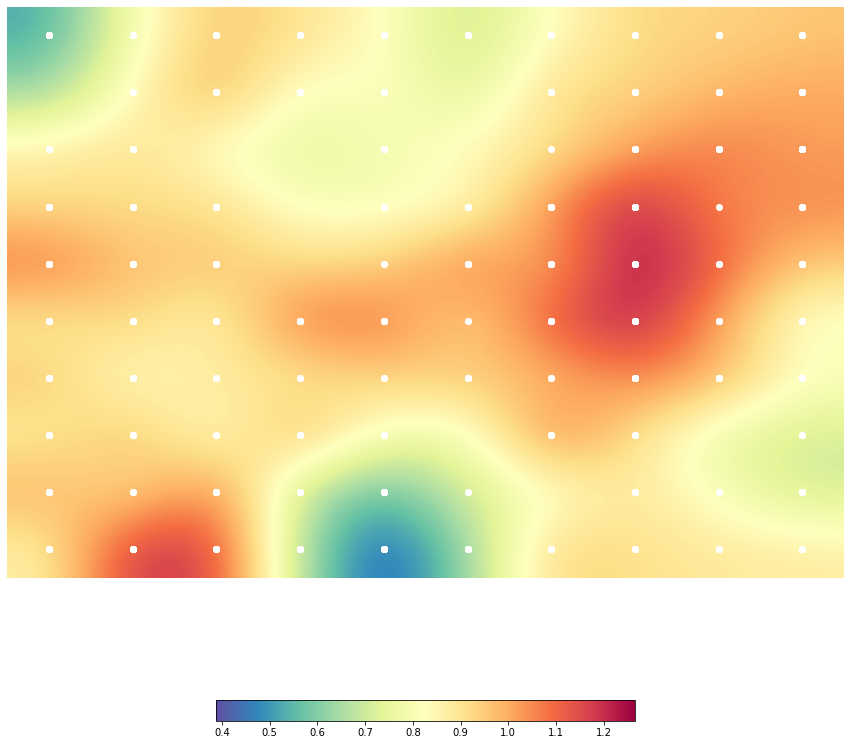

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som_10_10.view_umatrix(bestmatches=True, figsize=(15,15), colorbar=True)

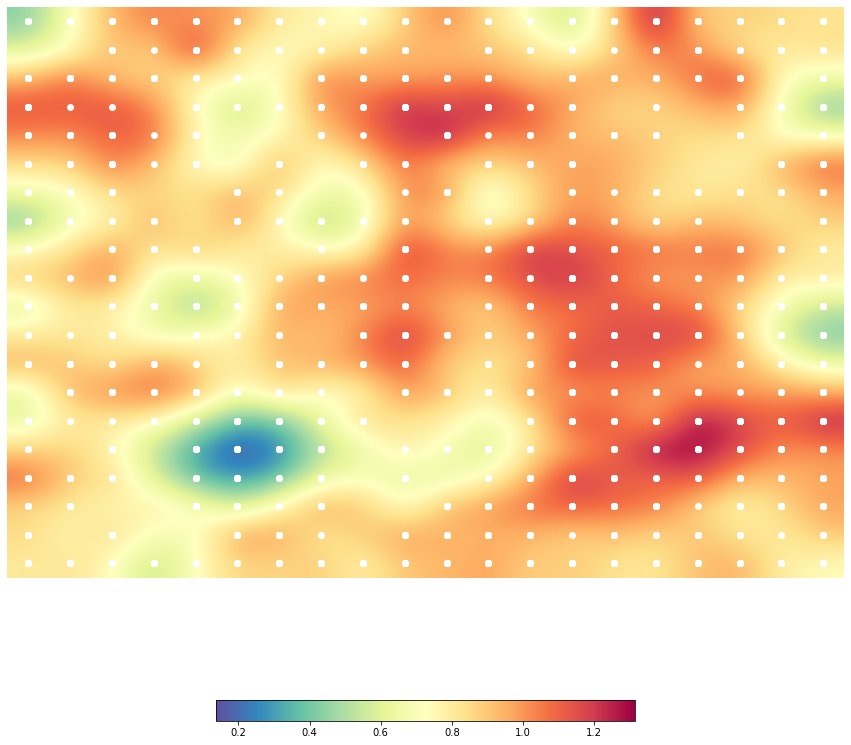

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som_20_20.view_umatrix(bestmatches=True, figsize=(15,15), colorbar=True)

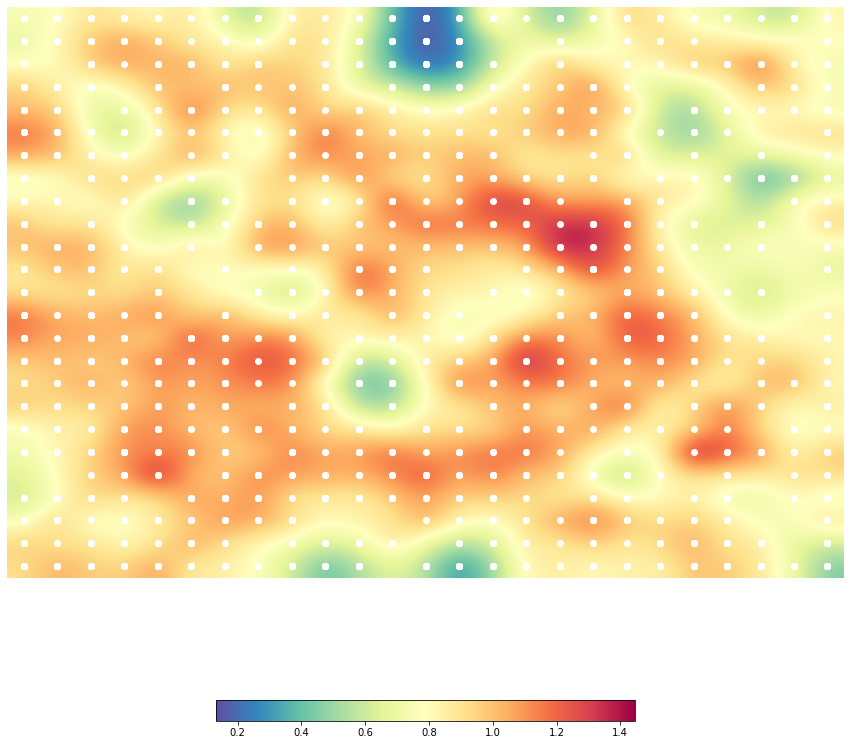

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som_25_25.view_umatrix(bestmatches=True, figsize=(15,15), colorbar=True)

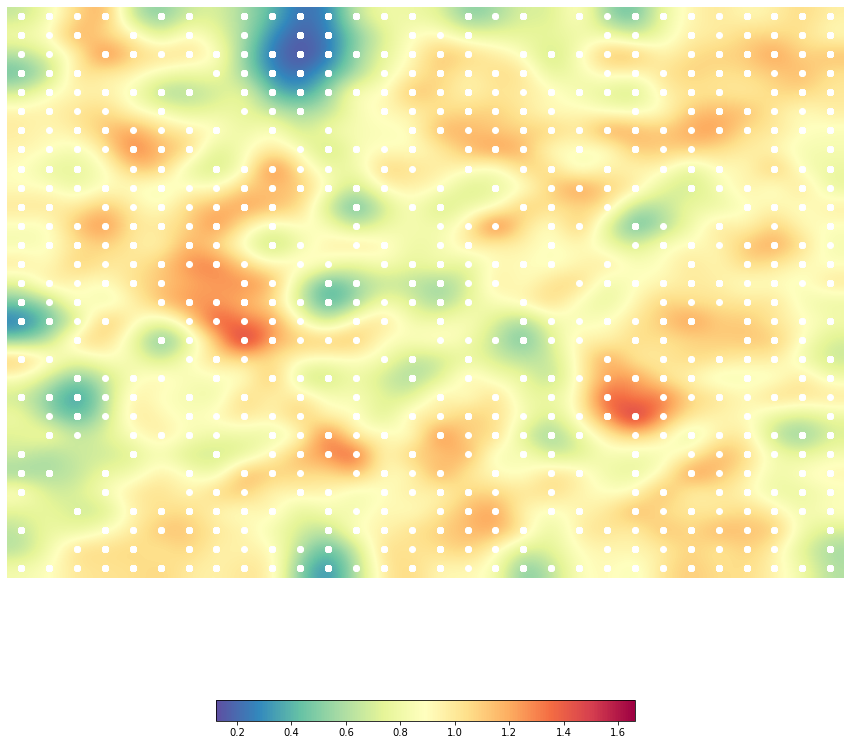

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som_30_30.view_umatrix(bestmatches=True, figsize=(15,15), colorbar=True)



**Παρατηρήσεις:**

Κατασκευάστηκαν και εκπαιδεύτηκαν χάρτες som με μεγέθη $10 \times 10, \: 20 \times 20, \: 25\times 25$ και $30 \times 30$. Για την παραμετροποίησή τους, πειραματιστήκαμε με τις παραμέτρους **neighborhood**, **compactsupport** και **gridtype**, επιλέγοντας να αλλάξουμε από τις default τιμές μόνο την **compactsupport** όπως φαίνεται παραπάνω.  

Παρατηρήθηκε ότι στους δύο μικρότερους χάρτες som εμφανίστηκαν αρκετά λίγες γειτονιές νευρώνων, σε βαθμό που δεν μπορούσαν να ικανοποιήσουν τις απαιτήσεις της άσκησης. Αντίθετα, στους δύο τελευταίους χάρτες με μήκη $25 \times 25$ και $30 \times 30$ εμφανίστηκαν περισσότερες και πιο ευκρινείς γειτονιές, χωρίς μάλιστα να χαθούν τα όρια μεταξύ τους, σε βαθμό που να απαγορεύει την χρήση τους. Για τον λόγο αυτό η υλοποιήση της υπόλοιπης άσκησης έγινε με βάση αυτούς τους δύο.

Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. Ενδεικτικά, με σωστή κωδικοποίηση tf-idf, μικροί χάρτες για λίγα δεδομένα (1000-2000) παίρνουν γύρω στο ένα λεπτό ενώ μεγαλύτεροι χάρτες με όλα τα δεδομένα μπορούν να πάρουν 10-15 λεπτά ή και περισσότερο.



## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύστε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύστε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. Σημειώστε ότι μπορεί να έχετε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.


In [ ]:
#Φορτώνουμε τους 2 χάρτες που θα αναλύσουμε στη συνέχεια.
som_25_25 = joblib.load(path+'map_25_25.pkl')
som_30_30 = joblib.load(path+'map_30_30.pkl')

In [ ]:
#Για κάθε χάρτη som βρίσκουμε τα bmus, τις συντεταγμένες δηλαδή του νευρώνα στον οποίο ανήκει κάθε μία από τις ταινίες της εισόδου. 
import numpy as np
bmus25 = som_25_25.bmus
bmus30 = som_30_30.bmus
print(bmus25)
print(bmus25.shape)
print(bmus30)
print(bmus30.shape)


[[ 5 24]
 [ 9 17]
 [22 19]
 ...
 [ 0  6]
 [19 14]
 [18  2]]
(5000, 2)
[[ 0 12]
 [24  0]
 [ 9 24]
 ...
 [28 20]
 [ 4 29]
 [11 19]]
(5000, 2)


In [ ]:
#Έπειτα και για τους δύο χάρτες som αποθηκεύονται και τυπώνονται τα μοναδικά best matching units.
ubmus25, indices25 = np.unique(bmus25, return_inverse=True, axis=0)
ubmus30, indices30 = np.unique(bmus30, return_inverse=True, axis=0)
print(ubmus25)
print(ubmus25.shape)
print(ubmus30)
print(ubmus30.shape)

[[ 0  0]
 [ 0  1]
 [ 0  2]
 ...
 [24 22]
 [24 23]
 [24 24]]
(512, 2)
[[ 0  0]
 [ 0  1]
 [ 0  2]
 ...
 [29 27]
 [29 28]
 [29 29]]
(672, 2)


Παρατηρείται ότι τα μοναδικά best matching units είναι λιγότερα από τους νευρώνεις που θα έπρεπει να είχαν οι χάρτες som ($25 \times 25 = 625$ νευρώνες και $30 \times 30=900$ νευρώνες). Το γεγονός αυτό οφείλεται στο ότι κάποιοι νευρώνες (και συγκεκριμένα αυτοί που δεν υπάρχουν στον πίνακα bmu) δεν νίκησαν ποτέ και δεν τους ανατέθηκε καμία ταινία.

In [ ]:
#Το κάθε ubmus έχει έναν μοναδικό δείκτη. Στη συνέχεια λοιπόν, για την κάθε ταινία τυπώνουμε τον δείκτη του ubmus στον οποίο ανήκει.
print(indices25)
print(indices25.shape)
print(indices30)
print(indices30.shape)

[127 204 473 ...   6 414 382]
(5000,)
[ 12 520 217 ... 637 110 257]
(5000,)



## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.


Έγιναν αρκετές δοκιμές $(k=\{20, 25, 30, 35, 40\})$ σχετικά με τον αριθμό των clusters που θα έπρεπε να δοθεί σαν όρισμα στον αλγόριθμο KMeans. Ύστερα από προσεκτική μελέτη τους καταλήξαμε στο συμπέρασμα ότι οι τιμές που επέφεραν καλύτερες ομαδοποιήσεις στους χάρτες ήταν για τον $25 \times 25$ το $k=30$ και για τον $30 \times 30$ το $k=35$.  

In [ ]:
from sklearn.cluster import KMeans
algorithm25 = KMeans(n_clusters = 30)
algorithm30 = KMeans(n_clusters = 35)
som_25_25.cluster(algorithm=algorithm25)
som_30_30.cluster(algorithm=algorithm30)


## Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. Μετά την ανάκληση ενός SOM θυμηθείτε να ακολουθήσετε τη διαδικασία για τα bmus.


In [ ]:
#Αποθηκεύουμε τους clustered χάρτες για να κάνουμε μοναδική ανάλυση.
joblib.dump(som_25_25, 'clustered_25.pkl')
joblib.dump(som_30_30, 'clustered_30.pkl')

['clustered_30.pkl']

In [ ]:
som_25_25 = joblib.load(path+'clustered_25.pkl')
som_30_30 = joblib.load(path+'clustered_30.pkl')


## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`. Μην τυπώνετε τις ετικέτες (labels) των δειγμάτων, είναι πολύ μεγάλος ο αριθμός τους.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώστε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters. 

Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:

<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">
<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">



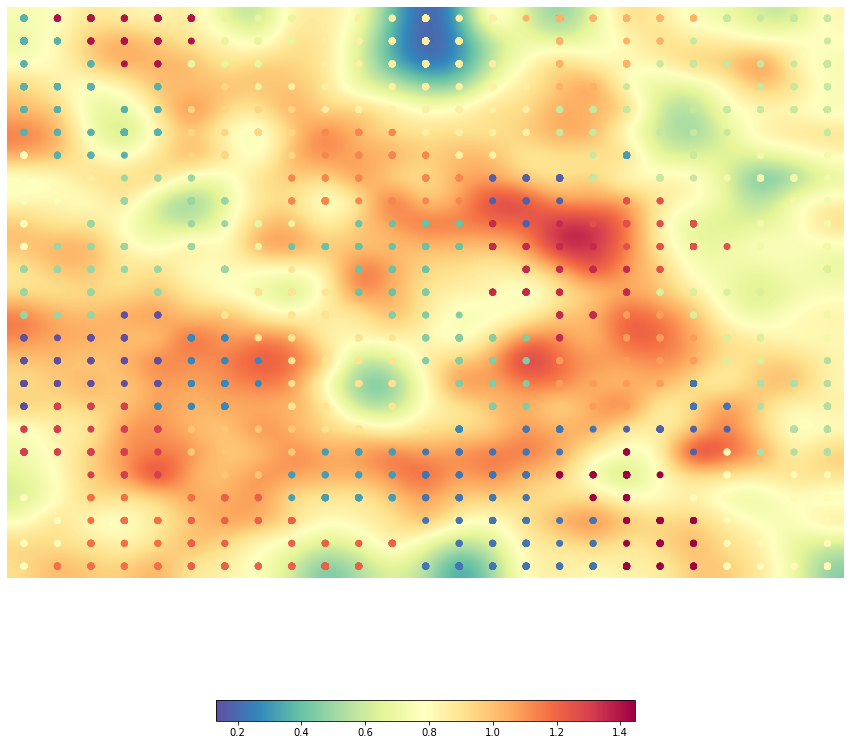

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som_25_25.view_umatrix(bestmatches=True, figsize=(15,15), colorbar=True)

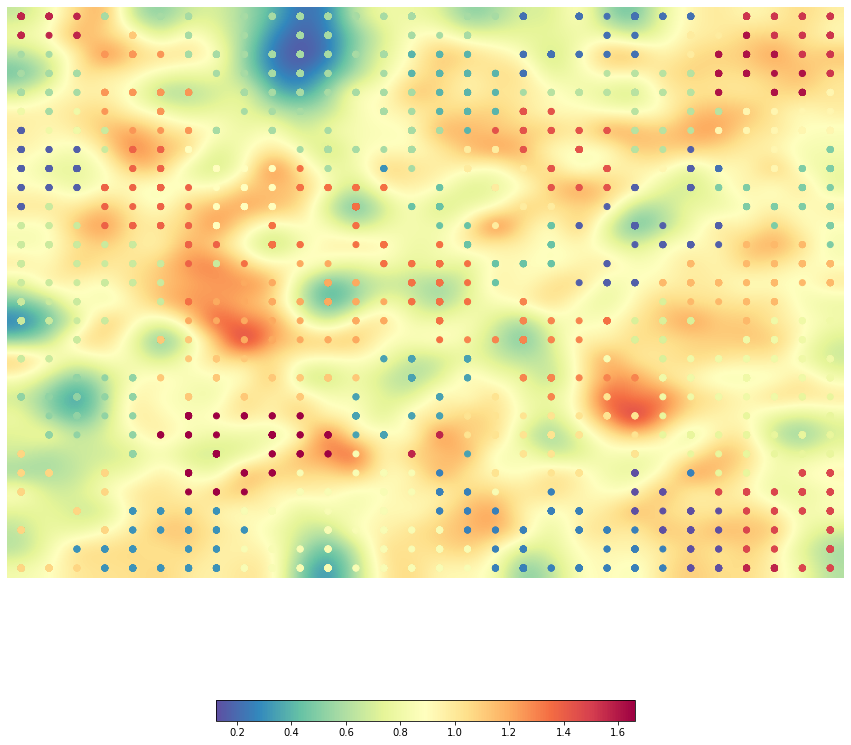

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som_30_30.view_umatrix(bestmatches=True, figsize=(15,15), colorbar=True)

In [ ]:
clusters25 = som_25_25.clusters
print(clusters25)
cl25_unique, cl25_counts = np.unique(clusters25, return_counts = True)
cl25_sorted = np.argsort(cl25_counts);

[[ 5 28 28 28 28 28 12 12 12 16 16 16 16 16 16 20 20 20 20 20 20 10 10 10
  10]
 [ 5  5 28 28 28 28 12 12 12 16 16 16 16 16 16 20 20 20 20 20 10 10 10 10
  10]
 [ 5  5  5 28 28 12 12 12 12 16 16 16 16 16 16 16 20 20 20 10 10 10 10 10
  10]
 [ 5  5  5  5  5 18 18 12 16 16 16 16 16 16 16 16 20 20 10 10 10 10 10 10
  10]
 [ 5  5  5  5  5 18 18 18 18 16 16 16 16 16 16 16 10 10 10 10 10 10 10 10
  10]
 [ 5  5  5  5  5 18 18 18 18 22 22 22 16 16 16 16 10 10 10 10 10 10 10 10
  10]
 [14  5  5  5  5 18 18 18 18 22 22 22 22 16 16  1  1 10  4 10 10 13 13 13
  13]
 [14 14 16  8  8  8  8 18 22 22 22 22 22 22  1  1  1 10 10 10 10 13 13 13
  13]
 [14 14  8  8  8  8  8 12 22 22 22 22 22 22  1  1  1 10 25 25 25 13 13 13
  13]
 [14 14  8  8  8  8  8 12 12 22  6  6  6  6 27  1 27 25 25 25 25 25 13 13
  13]
 [14  8  8  8  8  8  8 12  6  6  6  6  6  6 27 27 27 27 25 25 25 25 13 13
  13]
 [ 8  8  8  8  8  8  8 17 17  6  6  6  6  6 27 27 27 27 27 25 25 11 11 11
  11]
 [ 8  8  8  8  8  8 17 17 17 17  6  6  7

In [ ]:
print("Cluster IDs:", cl25_unique[cl25_sorted])
print("Number of neurons for above clusters:", cl25_counts[cl25_sorted])

Cluster IDs: [28 19  4  3 25 23  9 12 18  1 26 20 14  6 21  0 11 29 13 22  7 27 24 15
  5 17  8  2 16 10]
Number of neurons for above clusters: [11 12 13 14 14 14 15 15 15 16 16 16 17 17 18 18 19 19 20 20 20 20 22 23
 25 34 36 37 41 48]


In [ ]:
clusters30 = som_30_30.clusters
print(clusters30)
cl30_unique, cl30_counts = np.unique(clusters30, return_counts = True)
cl30_sorted = np.argsort(cl30_counts);

[[32 32 32 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10  2  2  2  2  2  2
   2 19 31 31 31 31]
 [32 32 32 25 22 10 10 10 10 10 10 10 10 10 10 10 10 10  2  2  2  2  2  2
  19 19 33 31 31 31]
 [10 10 10 25 25 25 10 10 10 10 10 10 10 10  6  6  6  6  2  2  2  2  2 11
  19 33 33 33 31 31]
 [10 10 10 25 25 25 25 10 10 10 10 10 10 10  6  6  6  6  2  2  2 11 11 11
  11 33 33 33 33 31]
 [10 10 10 25 25 25 25 25 10 10 10 10 10 10 10  6  6  6 10 11 11 11 11 11
  11 33 33 33 33 18]
 [15 10 15 25 25 25 25 10 10 10 10 10 10 10 10  6  6  6 29 29 11 11 11 11
  11 11 18 18 18 18]
 [ 1 15 15 12 25 25 25 10 10 10 10 10 10 10 10 10  6 29 29 29 29 29 11 11
  11 18 18 18 18 18]
 [ 1  1  1 12 28 28 17 17 17 10 10 10 10 10 10 10 19 19 29 29 29 29 11 11
   1 18 18 18 18  8]
 [ 1  1  1  1 28 28 17 17 17 17 27 10 27  4 10 19 19 19 19 29 29 29 17 18
   1  2  8 18  8  8]
 [ 1  1  1 28 28 28 28 17 17 17 27 27 27 27  7  7 19 19 19 29 29 29  1  1
   1  8  8  8  8  8]
 [ 1 12 12 28 28 28 28 17 17 17 17 27 27 27  7  7 

In [ ]:
print("Cluster IDs:", cl30_unique[cl30_sorted])
print("Number of neurons for above clusters:", cl30_counts[cl30_sorted])

Cluster IDs: [13 31 32 33  6 18  0 17 29 19  8 28 25  2 11 30  4  7  9  5 26 23 14 24
 21 34 22 20 15  3  1 12 27 16 10]
Number of neurons for above clusters: [ 9 10 11 12 15 16 17 17 18 18 19 20 20 22 22 22 22 22 23 23 23 23 24 28
 28 28 29 31 31 35 41 42 44 48 87]


### Παρατηρήσεις


*  Λόγω των μεγάλων διαστάσεων των χαρτών, οι πίνακες με τα clusters δεν έχουν τόσο βολική μορφή για να μελετηθούν από μόνοι τους και να γίνει εύκολα αντιληπτό αν έγινε καλή ομαδοποίηση νευρώνων ή όχι. Σε περιπτώσεις, ωστόσο, που τα διαγράμματα U-MATRIX προκαλούσαν αμφιβολίες για την ορθότητα του clustering (για παράδειγμα σε περιπτώσεις που μη γειτονικοί νευρώνες στο ανθρώπινο μάτι έμοιαζαν να έχουν ίδιο χρώμα), οι πίνακες με τα clusters χρησιμοποιούνταν για να τις εξαλείψουν
*   Στον χάρτη som $25 \times 25$ οι κύριες γειτονιές νευρώνων ανήκουν όλες σε διαφορετικές ομάδες. Παράλληλα τα όρια μεταξύ τους έχουν χωριστεί και αυτά αρκετά ομοιομορφά και με φαινομενικά σωστό τρόπο σε ομάδες. Το clustering επομένως που έχει γίνει μοιάζει να είναι το ιδανικό για το συγκεκριμένο χάρτη.
* Για τον $30 \times 30$ έχουμε περισσότερες ομάδες με όχι τόσο well-defined όρια οπότε βλέπουμε και περισσότερα clusters. Υπάρχουν διάφορα clusters που φαίνεται να έχουν τις ίδιες πρωτεύουσες κατηγορίες αλλά διαφορετικές δευτερεύουσες όπως φαίνεται και παραπάνω.
* Η διαφορά των δυο χαρτών έγκειται στον αριθμό των ομάδων που χωρίζουν τις ταινίες. Ο $25 \times 25$ δημιουργεί λιγότερες αλλά πιο ευκρινώς διαχωρισμένες ομάδες, ενώ ο $30 \times 30$ δημιουργεί περισσότερες ομάδες χωρίς σαφή όρια μεταξύ τους. Αυτό δεν ειναι παράλογο αν αναλογιστούμε ότι έχουμε 322 κατηγορίες ταινιών και η κάθε ταινία ανήκει σε πολλαπλές κατηγορίες.






## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης με το tf-idf και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Μπορείτε να υλοποιήσετε τη συνάρτηση αυτή όπως θέλετε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

Μπορείτε βέβαια να προσθέσετε οποιαδήποτε επιπλέον έξοδο σας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα cluster (μη βελτιστοποιημένος χάρτης, ωστόσο βλέπετε ότι οι μεγάλες κατηγορίες έχουν σημασιολογική  συνάφεια):

```
Overall Cluster Genres stats:  
[('"Horror"', 86), ('"Science Fiction"', 24), ('"B-movie"', 16), ('"Monster movie"', 10), ('"Creature Film"', 10), ('"Indie"', 9), ('"Zombie Film"', 9), ('"Slasher"', 8), ('"World cinema"', 8), ('"Sci-Fi Horror"', 7), ('"Natural horror films"', 6), ('"Supernatural"', 6), ('"Thriller"', 6), ('"Cult"', 5), ('"Black-and-white"', 5), ('"Japanese Movies"', 4), ('"Short Film"', 3), ('"Drama"', 3), ('"Psychological thriller"', 3), ('"Crime Fiction"', 3), ('"Monster"', 3), ('"Comedy"', 2), ('"Western"', 2), ('"Horror Comedy"', 2), ('"Archaeology"', 2), ('"Alien Film"', 2), ('"Teen"', 2), ('"Mystery"', 2), ('"Adventure"', 2), ('"Comedy film"', 2), ('"Combat Films"', 1), ('"Chinese Movies"', 1), ('"Action/Adventure"', 1), ('"Gothic Film"', 1), ('"Costume drama"', 1), ('"Disaster"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Film noir"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Action"', 1)]```
   

In [ ]:
def print_categories_stats(movies_id, limit):
  all_categories = []
  for id in movies_id:
    cats = np.array2string(categories[id])[2:-2].split(',')
    cats = [cat.strip().strip('"').replace('\\', '') for cat in cats]
    all_categories.extend(cats)
  cat_unique, cat_counts = np.unique(all_categories, return_counts = True)
  cat_sorted = np.argsort(cat_counts)[::-1]
  
  for cat in cat_sorted[:limit]:
    print(cat_unique[cat], cat_counts[cat])


In [ ]:
def print_cluster_neurons_movies_report(cluster_id, map):
  if map==30:
    clusters = clusters30
  else:
    clusters = clusters25
  col,row = np.where(clusters == cluster_id)
  idx = np.column_stack((row, col))

  all_bmus = []
  for bmu in idx:
    if bmu in ubmus25:
      all_bmus.append(bmu)

  return all_bmus


In [ ]:
#Η μεταβλητή lim ορίζει πόσες πρωτεύουσες κατηγορίες θα τυπωθούν κάθε cluster
def neuron_movies_report(neurons,map,lim=-1):
  idx = []
  if map == 25:
    bmus = bmus25
    indices = indices25
  else:
    bmus = bmus30
    indices = indices30
  for i in range(len(bmus)):
    for neuron in neurons:
      if np.array_equal(neuron,bmus[i]):
        idx.append(i)

  movies = []
  for i in range(len(indices)):
    if indices[i] in idx:
      movies.append(i)
  
  print_categories_stats(movies, lim)

In [ ]:
for i in range(30):
  print("Cluster #", i, sep='')
  neuron_movies_report(print_cluster_neurons_movies_report(i,25), 25, lim=10)
  print()

Cluster #0
Short Film 82
Science Fiction 20
Horror 20
Creature Film 20
Thriller 19
Comedy 17
Crime Thriller 17
Psychological thriller 16
Documentary 15
Suspense 12

Cluster #1
Drama 56
Comedy 43
Indie 39
Romance Film 30
Black-and-white 28
Silent film 25
Romantic drama 23
Romantic comedy 23
Comedy-drama 21
Action 12

Cluster #2
Drama 225
Thriller 85
Action 54
Crime Fiction 37
Comedy 31
Family Film 31
Animation 28
Indie 27
Horror 26
Period piece 25

Cluster #3
Drama 43
World cinema 32
Romance Film 31
Romantic drama 28
Bollywood 28
Musical 28
Comedy 23
Action 23
Crime Fiction 19
Action/Adventure 19

Cluster #4
Comedy 46
Drama 35
Thriller 35
Horror 28
Family Film 27
Comedy-drama 21
Short Film 20
Animation 19
Action 18
Crime Fiction 12

Cluster #5
Drama 196
Comedy 108
Romance Film 100
World cinema 40
War film 40
Crime Fiction 40
Action 33
Musical 31
Black-and-white 24
Action/Adventure 23

Cluster #6
Drama 18
Indie 16
Crime Fiction 14
Thriller 9
Action 8
Action/Adventure 6
Adventure 5
Black-

In [ ]:
for i in range(35):
  print("Cluster #", i, sep='')
  neuron_movies_report(print_cluster_neurons_movies_report(i,30), 30, lim=10)
  print()

Cluster #0
Drama 24
Family Film 21
Family Drama 17
Comedy 13
Mystery 13
Television movie 8
Adventure 7
Satire 6
Fantasy 6
Film noir 5

Cluster #1
Drama 99
Action 44
Thriller 37
Adventure 36
Crime Fiction 36
Action/Adventure 30
Family Film 28
Comedy 27
Fantasy 26
Family Drama 17

Cluster #2
Drama 167
Romance Film 78
Comedy 76
Romantic drama 40
Indie 34
Black-and-white 26
Thriller 20
Action 18
War film 18
Musical 18

Cluster #3
Action 61
Comedy 55
Action/Adventure 55
Documentary 52
Thriller 52
Drama 38
World cinema 34
Horror 28
Mystery 24
Crime Fiction 23

Cluster #4
Drama 113
World cinema 27
Thriller 24
Comedy 24
Action 20
Romance Film 18
Musical 17
Action/Adventure 17
Bollywood 16
Adventure 14

Cluster #5
Drama 31
Romance Film 17
Western 15
Film adaptation 12
Romantic drama 12
Fantasy 5
Thriller 3
World cinema 2
Kitchen sink realism 2
Action/Adventure 2

Cluster #6
Drama 16
Comedy 15
Indie 8
Action 7
Adventure 7
Science Fiction 6
Superhero movie 6
Action/Adventure 6
Sports 5
Black come


## Tips για το SOM και το clustering

- Για την ομαδοποίηση ένα U-matrix καλό είναι να εμφανίζει και μπλε-πράσινες περιοχές (clusters) και κόκκινες περιοχές (ορίων). Παρατηρήστε ποια σχέση υπάρχει μεταξύ αριθμού ταινιών στο final set, μεγέθους grid και ποιότητας U-matrix.
- Για το k του k-Means προσπαθήστε να προσεγγίζει σχετικά τα clusters του U-matrix (όπως είπαμε είναι διαφορετικοί μέθοδοι clustering). Μικρός αριθμός k δεν θα σέβεται τα όρια. Μεγάλος αριθμός θα δημιουργεί υπο-clusters εντός των clusters που φαίνονται στο U-matrix. Το τελευταίο δεν είναι απαραίτητα κακό, αλλά μεγαλώνει τον αριθμό clusters που πρέπει να αναλυθούν σημασιολογικά.
- Σε μικρούς χάρτες και με μικρά final sets δοκιμάστε διαφορετικές παραμέτρους για την εκπαίδευση του SOM. Σημειώστε τυχόν παραμέτρους που επηρεάζουν την ποιότητα του clustering για το dataset σας ώστε να τις εφαρμόσετε στους μεγάλους χάρτες.
- Κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Δοκιμάστε μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχη προσαρμογή των k. Όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν.




## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering θα έχετε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής σας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook (η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας).

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 

1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.
2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.
3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

Προφανώς τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.



Τέλος, εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.


Θα αναλύσουμε ποιοτικά μερικά clusters του χάρτη $30 \times 30$.

### Παράδειγμα συχνών και λιγότερο συχνών κατηγοριών ταινιών

Βλέπουμε παρακάτω ότι υπάρχουν κάποιες κατηγορίες που χαρακτηρίζουν μεγάλο αριθμό ταινιών (Drama, Comedy) και κάποιες άλλες που χαρακτηρίζουν μικρό αριθμό ταινιών (Feminist Film, Juvenile Delinquency Film)

In [ ]:
  neuron_movies_report(print_cluster_neurons_movies_report(10,30), 30)

Drama 533
Comedy 178
Action 173
Romance Film 171
Horror 134
World cinema 115
Black-and-white 89
Adventure 70
Thriller 68
Musical 67
Family Film 64
Crime Fiction 62
Action/Adventure 61
Romantic comedy 61
Short Film 59
War film 56
Film adaptation 43
Indie 39
Romantic drama 37
Mystery 35
Fantasy 34
Period piece 33
Western 32
Comedy-drama 30
Coming of age 29
Crime Thriller 27
Biographical film 26
Slasher 26
Science Fiction 26
Black comedy 24
Psychological thriller 23
Comedy film 23
Teen 21
Animation 21
Cult 19
Film noir 19
Biography 19
Television movie 19
Art film 18
Sports 16
Suspense 16
Biopic [feature] 15
Supernatural 14
Japanese Movies 14
History 13
Silent film 13
Costume drama 13
Parody 12
Family Drama 12
Political drama 11
Docudrama 11
Historical fiction 11
Satire 10
Comedy of manners 10
Screwball comedy 10
Children's 9
Anime 9
Music 9
Chinese Movies 9
Documentary 8
Ensemble Film 8
Slapstick 8
Buddy film 8
Melodrama 8
Filipino Movies 8
Road movie 7
Martial Arts Film 7
Spy 7
Musical c

### Μακρινά πρότυπα εισόδου που απεικονίζονται σε απομακρυσμένες περιοχές



In [ ]:
 neuron_movies_report(print_cluster_neurons_movies_report(32,30), 30)

Comedy 100
Drama 18
Mystery 18
Crime Fiction 18
Western 17
Action/Adventure 15
Crime Thriller 11
Thriller 11
Black-and-white 6
Comedy Western 3
Crime Drama 2
Television movie 2
Romantic drama 2
Buddy film 1
Chinese Movies 1
Comedy Thriller 1
Feminist Film 1
Courtroom Drama 1
Documentary 1
Art film 1
World cinema 1
Film adaptation 1
Film noir 1
Neo-noir 1
Period piece 1
Political drama 1
Political thriller 1
Revisionist Western 1
Romance Film 1
Science Fiction 1
Screwball comedy 1
Social problem film 1
Space western 1
Stand-up comedy 1
War film 1


In [ ]:
 neuron_movies_report(print_cluster_neurons_movies_report(26,30), 30)

Romance Film 26
Drama 25
Thriller 22
Crime Fiction 21
Mystery 14
Musical 13
Action 12
Romantic comedy 11
Black-and-white 11
World cinema 11
Crime Thriller 10
Social issues 9
Psychological thriller 9
Culture & Society 9
Documentary 9
Period piece 9
War film 8
Film noir 8
Romantic drama 8
Suspense 7
Melodrama 7
Horror 6
Action/Adventure 6
Comedy 6
Indie 6
Political cinema 5
Biography 4
Film adaptation 4
Law & Crime 4
Fantasy 4
Detective 3
Martial Arts Film 3
Political drama 3
Animation 3
Family Film 3
Silent film 3
Slasher 3
Docudrama 2
Television movie 2
Screwball comedy 2
Detective fiction 2
Crime Drama 2
Satire 2
Comedy film 2
Filipino Movies 2
Spaghetti Western 2
Children's 2
Short Film 2
Music 2
Art film 2
Computer Animation 1
Road movie 1
Adventure 1
Animated cartoon 1
Costume drama 1
Anthropology 1
British New Wave 1
Bollywood 1
Comedy-drama 1
Comedy of manners 1
Avant-garde 1
Beach Film 1
Religious Film 1
Coming of age 1
Musical comedy 1
Disaster 1
Surrealism 1
Neo-noir 1
Media S

### Κοντινά πρότυπα εισόδου που απεικονίζονται κοντά μεταξύ τους
Παρατηρούμε ότι τα romance films είναι κατα βάση κοντά μεταξύ τους. Επίσης όπου υπάρχουν romance films υπάρχει η γενικότερη κατηγορία Drama που τα σκεπάζει

In [ ]:
 neuron_movies_report(print_cluster_neurons_movies_report(5,30), 30)

Drama 31
Romance Film 17
Western 15
Film adaptation 12
Romantic drama 12
Fantasy 5
Thriller 3
World cinema 2
Kitchen sink realism 2
Action/Adventure 2
Crime Fiction 2
Action 2
War film 2
Television movie 2
New Hollywood 1
Teen 1
Animation 1
Anime 1
Biker Film 1
Black-and-white 1
British New Wave 1
Chinese Movies 1
Epic 1
Mystery 1
Erotic Drama 1
Family Drama 1
Family Film 1
Sports 1
Social problem film 1
Road movie 1
Japanese Movies 1
Revisionist Western 1


In [ ]:
 neuron_movies_report(print_cluster_neurons_movies_report(16,30), 30)

Drama 154
Romance Film 70
Crime Fiction 69
World cinema 68
Romantic drama 54
Comedy 44
Adventure 37
Thriller 35
Silent film 34
Horror 33
Black-and-white 24
Family Film 24
Fantasy 23
Animation 20
Action/Adventure 19
Action 15
Children's/Family 15
Romantic comedy 13
Mystery 13
Children's Fantasy 11
Children's 10
Crime Thriller 10
Coming of age 10
Indie 9
Film noir 8
Teen 8
Comedy-drama 8
Musical 8
Melodrama 8
Psychological thriller 8
Science Fiction 8
War film 7
Slapstick 7
Art film 7
Chinese Movies 7
Superhero movie 7
Superhero 6
Filipino Movies 5
Family Drama 5
Computer Animation 5
Screwball comedy 5
Buddy film 5
Animated Musical 5
Music 5
Suspense 4
Documentary 4
Family-Oriented Adventure 4
Japanese Movies 3
Fantasy Adventure 3
Cult 3
Detective 3
Anime 2
Erotic thriller 2
Fairy tale 2
Costume drama 2
Crime Comedy 2
Biographical film 2
Comedy film 2
Action Thrillers 2
Black comedy 2
Americana 2
Fantasy Comedy 2
Parody 2
Spy 2
Remake 2
Rockumentary 2
Satire 2
Marriage Drama 2
Historical

### Clusters που δεν έχουν ξεκάθαρα χαρακτηριστικά

Στον τελικό χάρτη δεν έχουμε πολλά μεγάλα clusters, και όσα είναι μεγάλα είναι αρκετά well-defined. Το παρακάτω μικρό cluster όμως δεν έχει τόσο ξεκάθαρα χαρακτηρηστικά.

In [ ]:
neuron_movies_report(print_cluster_neurons_movies_report(9,30), 30)

Black-and-white 32
Comedy 29
Drama 28
Indie 28
Silent film 26
Action 21
Thriller 17
Short Film 15
World cinema 10
Action/Adventure 9
Horror 8
Adventure 7
Romance Film 6
Musical 6
Comedy-drama 5
Slapstick 5
Bollywood 4
Chinese Movies 4
Music 4
Documentary 4
Melodrama 4
B-movie 3
Costume Horror 3
Creature Film 3
Crime Fiction 3
Martial Arts Film 3
Family Film 3
Monster 2
Gothic Film 2
Romantic comedy 2
Period piece 2
Romantic drama 2
Fantasy 2
Natural horror films 2
Animation 2
Sex comedy 1
Biographical film 1
Art film 1
Psychological thriller 1
War film 1
Science Fiction 1
Buddy film 1
Animal Picture 1
Christmas movie 1
Tragicomedy 1
Comedy film 1
Suspense 1
Superhero movie 1
Coming of age 1
Crime Comedy 1
Costume drama 1
Pre-Code 1
Musical comedy 1
Media Satire 1
Mystery 1
Swashbuckler films 1
Hybrid Western 1
Western 1
History 1
Family Drama 1
Epic 1
Ensemble Film 1
Tamil cinema 1
Domestic Comedy 1
News 1
Cult 1
Mockumentary 1


Επίσης, τα clusters #1 και #17 είναι κοντά αλλά δε φαίνεται να έχουν συνάφεια.


In [ ]:
 neuron_movies_report(print_cluster_neurons_movies_report(17,30), 30)

Drama 13
Horror 8
Creature Film 8
Comedy 7
Romance Film 5
Indie 4
Monster movie 4
World cinema 4
Sports 3
Family Film 3
Crime Fiction 3
Adventure 2
Archaeology 2
B-movie 2
Musical 2
Film adaptation 2
Coming of age 2
Costume Horror 1
Comedy-drama 1
Comedy film 1
Comedy of manners 1
Television movie 1
Bollywood 1
Black-and-white 1
Beach Film 1
Teen 1
Romantic comedy 1
Documentary 1
Period piece 1
Haunted House Film 1
Thriller 1
Inspirational Drama 1
Juvenile Delinquency Film 1
Mockumentary 1
Romantic drama 1
Music 1
Musical comedy 1
Mystery 1
Parody 1


In [ ]:
 neuron_movies_report(print_cluster_neurons_movies_report(1,30), 30)

Drama 99
Action 44
Thriller 37
Adventure 36
Crime Fiction 36
Action/Adventure 30
Family Film 28
Comedy 27
Fantasy 26
Family Drama 17
Crime Thriller 17
Animation 15
Science Fiction 15
Romance Film 14
Indie 13
Comedy-drama 13
Horror 12
Mystery 12
Black-and-white 11
War film 11
Children's/Family 9
World cinema 9
Japanese Movies 8
Slasher 7
Comedy film 7
Martial Arts Film 7
B-movie 7
Crime Comedy 7
Short Film 6
Silent film 6
Film adaptation 6
Television movie 4
Gangster Film 4
Melodrama 4
Costume drama 3
Cult 3
Heist 3
Ensemble Film 3
Fairy tale 3
Computer Animation 3
Spy 3
Musical 3
Psychological thriller 3
Black comedy 3
Action Thrillers 3
Children's Fantasy 2
Children's 2
Caper story 2
Suspense 2
Blaxploitation 2
Doomsday film 2
Biographical film 2
Alien Film 2
Western 2
Stop motion 2
Family-Oriented Adventure 2
Superhero movie 2
Fantasy Adventure 2
Sports 2
Period piece 2
Monster movie 2
Monster 2
New Hollywood 2
Workplace Comedy 2
Romantic drama 2
Tragedy 1
Satire 1
Outlaw biker film 

Για τις παραπάνω αστοχίες του χάρτη ευθύνονται αρκετά πράγματα. Τα βασικά είναι:

* Η δυσκολία να απεικονίσουμε/κατηγοριοποιήσουμε τις ταινίες σε ένα δισδιάστατο χάρτη
* Η μείωση των διαστάσεων που εφαρμόσαμε μειώνοντας τις διαστάσεις του corpus μέσω PCA/παραμετροποιημένου TfidfVectorizer.
* Τα γνωστά μειονεκτήματα του TFIDF.
* Το γεγονός ότι κάποιες περιγραφές ταινιών μοιάζουν χωρίς να είναι ίδια τα genre τους (αυτό φάνηκε και στο 1ο μέρος της άσκησης)
* Η γενική μορφή του dataset.

### Clusters που παρουσιάζουν ενδιαφέρον

Παρατηρούμε ότι το cluster \#30 είναι πολύ συγκεκριμένο με μόλις 13 ταινίες που έχουν την ίδια διπλή κατηγοριοποίηση. Έχοντας κάποια όχι τόσο well-defined clusters και έχοντας άλλα clusters με dominant κατηγορίες τις thriller, action δε θα περιμέναμε να δούμε κάποιο τέτοιο cluster. Επίσης το συγκεκριμένο cluster δεν έχει ιδιαίτερη συνάφεια με τα υπόλοιπα γύρω του.


In [ ]:
 neuron_movies_report(print_cluster_neurons_movies_report(30,30), 30)

Thriller 13
Action 13


Eπίσης έχουμε ένα cluster που γίνεται dominated από short films τα οποία δεν έχουν όμως κοινό περιεχόμενο κατά τα άλλα.

In [ ]:
 neuron_movies_report(print_cluster_neurons_movies_report(31,30), 30)

Short Film 62
Comedy 22
Animation 19
Science Fiction 19
Romance Film 19
Horror 17
Drama 13
Indie 13
Romantic comedy 10
Parody 10
Satire 9
Coming of age 8
Action/Adventure 7
Adventure 6
Action 6
Thriller 5
Documentary 4
Disaster 4
Japanese Movies 3
Anime 3
Period piece 3
Family Drama 3
Cult 3
Comedy-drama 3
War film 3
Black-and-white 2
World cinema 2
Ensemble Film 2
Melodrama 2
Film adaptation 2
Airplanes and airports 2
Musical 2
Political cinema 2
Political satire 2
Psychological thriller 2
Sex comedy 2
Action Thrillers 2
Comedy film 2
Art film 1
Animated cartoon 1
B-movie 1
Blaxploitation 1
Chase Movie 1
Chinese Movies 1
Combat Films 1
Zombie Film 1
Comedy of Errors 1
Crime Drama 1
Crime Thriller 1
Dance 1
Domestic Comedy 1
Educational 1
Fantasy 1
Hip hop movies 1
Martial Arts Film 1
Mockumentary 1
Monster 1
Monster movie 1
Romantic drama 1
Spy 1
Therimin music 1


Τέλος, βλέπουμε ένα cluster που περιέχει κατά βάση Creature Films και Monster films.

In [ ]:
 neuron_movies_report(print_cluster_neurons_movies_report(17,30), 30)

Drama 13
Horror 8
Creature Film 8
Comedy 7
Romance Film 5
Indie 4
Monster movie 4
World cinema 4
Sports 3
Family Film 3
Crime Fiction 3
Adventure 2
Archaeology 2
B-movie 2
Musical 2
Film adaptation 2
Coming of age 2
Costume Horror 1
Comedy-drama 1
Comedy film 1
Comedy of manners 1
Television movie 1
Bollywood 1
Black-and-white 1
Beach Film 1
Teen 1
Romantic comedy 1
Documentary 1
Period piece 1
Haunted House Film 1
Thriller 1
Inspirational Drama 1
Juvenile Delinquency Film 1
Mockumentary 1
Romantic drama 1
Music 1
Musical comedy 1
Mystery 1
Parody 1



# Τελική παράδοση άσκησης

- Θα παραδώσετε στο eclass το παρόν notebook επεξεργασμένο ή ένα νέο με τις απαντήσεις σας για τα ζητούμενα και των δύο εφαρμογών. 
- Θυμηθείτε ότι η ανάλυση του χάρτη στο markdown με αναφορά σε αριθμούς clusters πρέπει να αναφέρεται στον τελικό χάρτη με τα κελιά ορατά που θα παραδώσετε αλλιώς ο χάρτης που θα προκύψει θα είναι διαφορετικός και τα labels των clusters δεν θα αντιστοιχούν στην ανάλυσή σας. 
- Μην ξεχάσετε στην αρχή ένα κελί markdown με **τα στοιχεία της ομάδας σας**.
- Στο **zip** που θα παραδώσετε πρέπει να βρίσκονται **2 αρχεία (το .ipynb και το .py του notebook σας)**.

<table>
  <tr><td align="center">
    <font size="4">Παρακαλούμε διατρέξτε βήμα-βήμα το notebook για να μην ξεχάσετε παραδοτέα!</font>
</td>
  </tr>
</table>